***

# Análisis de datos I

***

### Taller 2 - Comparte tu análisis univariado

#### 1. Selección de las columnas para el análisis.

Para llevar a cabo el análisis univariado del dataset definido, se seleccionaron las siguientes columnas: 

1. **Saldo (Balance)**: El saldo o balance en la cuenta bancaria es importante para evaluar la salud financiera del cliente y su potencial lealtad. Un saldo más alto podría estar correlacionado con una menor tasa de cancelación, dado que los clientes con más dinero podrían estar más satisfechos y menos propensos a abandonar la entidad bancaria.

2. **PuntajeCredito (CreditScore)**: Este es un indicador relevante de la solvencia financiera del cliente. Un puntaje de crédito más alto generalmente sugiere un menor riesgo de impago. Por lo que comprender la distribución de esta variable puede ayudar a identificar segmentos de clientes con mayor riesgo de abandono.

Estas columnas son relevantes porque pueden influir significativamente en la capacidad de un cliente para abandonar la entidad bancaria (columna **ClienteAbandono**). Para esto, se analizará cada columna por separado, proporcionando estadísticas descriptivas y visualizaciones para entender mejor su distribución y posibles anomalías.

#### 2. Análisis estadístico y gráfico univariado

A continuación se presenta el análisis estadístico y gráfico univariado para las columnas seleccionadas, implementado en Python.

In [3]:
#Importar las bibliotecas de Python requeridas.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el Data Frame.
df = pd.read_csv('customer_churn_records.csv')

# Eliminar la columna RowNumber del DataFrame.
df = df.drop('RowNumber', axis = 1)

In [4]:
# Verificar si existen datos vacíos o faltantes en el Dataframe.
df.isna().sum()

CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

Se puede observar que no hay datos vacíos o faltantes en el dataset definido.

In [5]:
# Imprimir los primeros cinco registros del DataFrame.
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [6]:
# Imprimir los últimos cinco registros del DataFrame.
df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [7]:
# Definir las columas del DataFrame.
df.columns = ['ClienteId', 'Nombre', 'PuntajeCredito', 'Pais', 'Genero', 'Edad', 'TiempoPermanencia', 'Saldo', 'CantidadProductos', 'TieneTarjetaCredito', 'EstaActivo', 'SalarioEstimado', 'ClienteAbandono', 'HizoReclamo', 'NivelSatisfaccion', 'TipoTarjeta', 'PuntosObtenidos']

# Imprimir los primeros cinco registros del DataFrame con los nuevos nombres de las columnas.
df.head()

,ClienteId,Nombre,PuntajeCredito,Pais,Genero,Edad,TiempoPermanencia,Saldo,CantidadProductos,TieneTarjetaCredito,EstaActivo,SalarioEstimado,ClienteAbandono,HizoReclamo,NivelSatisfaccion,TipoTarjeta,PuntosObtenidos
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [8]:
# Obtener los datos de las columnas Saldo, PuntajeCredito y ClienteAbandono.
saldo = df['Saldo']
puntaje_credito = df['PuntajeCredito']
cliente_abandono = df['ClienteAbandono']

##### **2.1 Columna Saldo**

A continuación se presentan los estadísticos descriptivos y gráficos de la columna **Saldo**.

In [9]:
# Obtener los estadísticos descriptivos para Saldo.
saldo.describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Saldo, dtype: float64

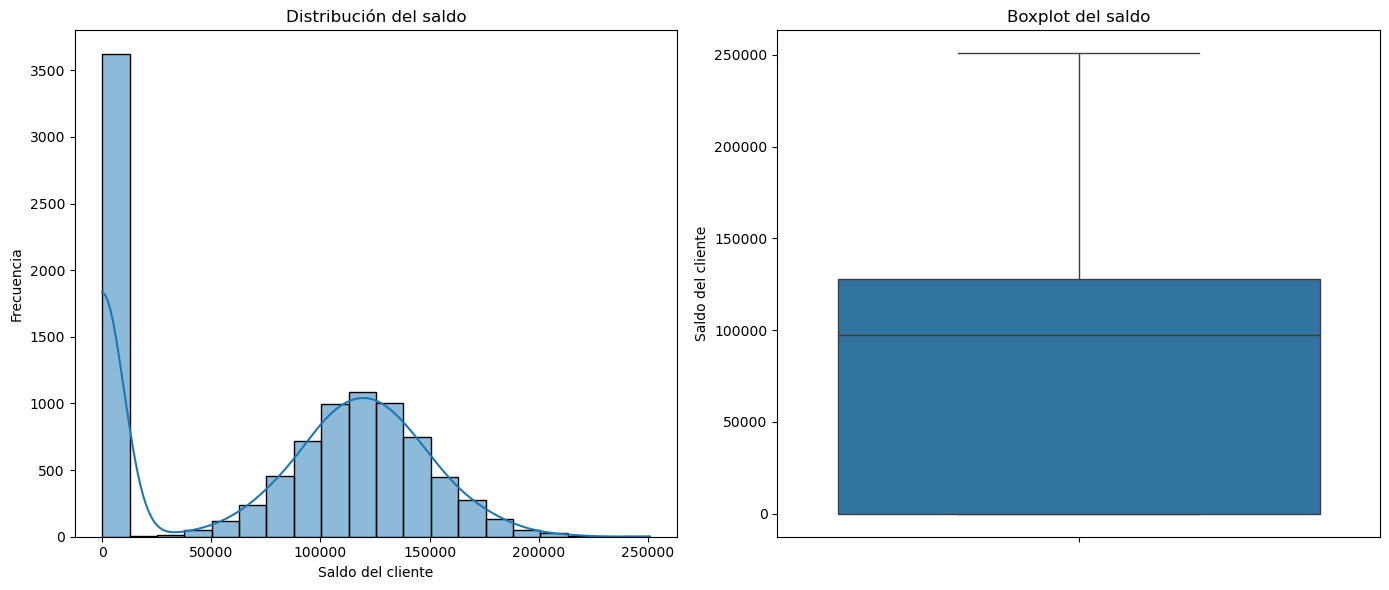

In [10]:
# Gráfico de distribución y bloxpot de Saldo.
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.histplot(saldo, bins = 20, kde = True)

plt.xlabel('Saldo del cliente')
plt.ylabel('Frecuencia')
plt.title('Distribución del saldo')

plt.subplot(1, 2, 2)
sns.boxplot(y = saldo)

plt.ylabel('Saldo del cliente')
plt.title('Boxplot del saldo')

plt.tight_layout()
plt.show()

Para la columna **Saldo** se puede observar una gran dispersión, con una alta concentración en valores bajos (cero) y unos pocos clientes con saldos extremadamente altos. La mayoría de los saldos de los clientes se encuentran agrupados entre \\$0 y \\$200,000, con una tendencia hacia el extremo inferior. Los valores atípicos podrían indicar clientes con balances inusualmente altos, posiblemente importantes para estrategias de retención.

##### **2.2 Columna PuntajeCredito**

A continuación se presentan los estadísticos descriptivos y gráficos de la columna **PuntajeCredito**.

In [12]:
# Obtener los estadísticos descriptivos para PuntajeCredito.
puntaje_credito.describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: PuntajeCredito, dtype: float64

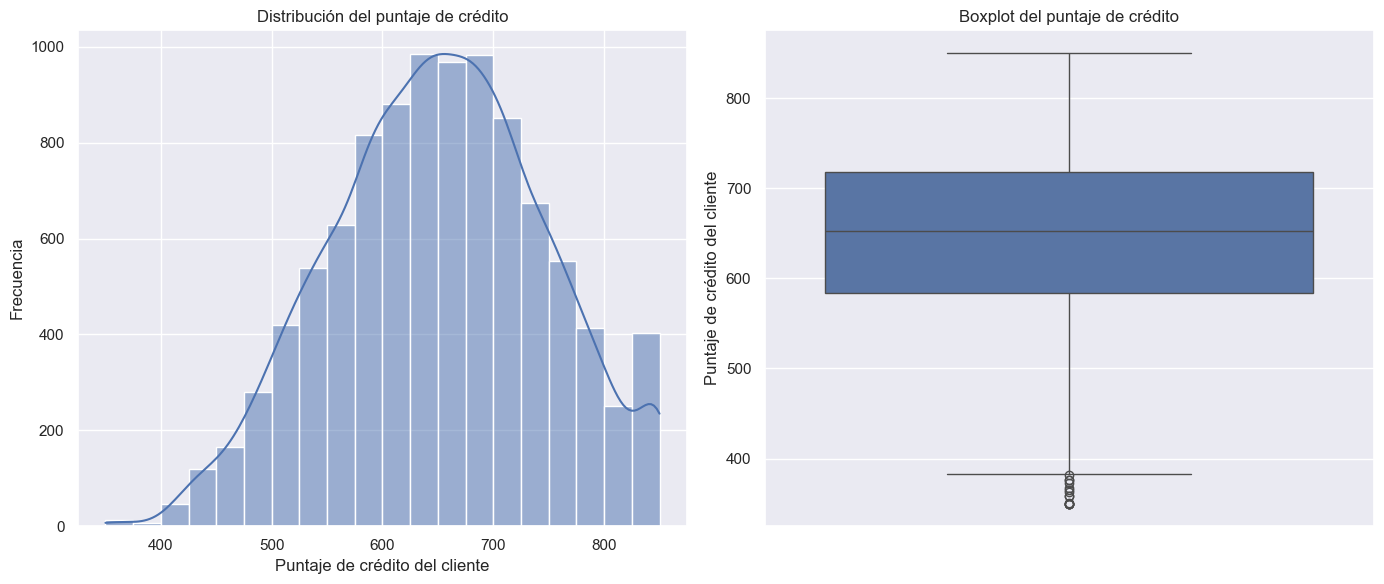

In [260]:
# Gráfico de distribución y bloxpot de PuntajeCredito.
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.histplot(puntaje_credito, bins = 20, kde = True)

plt.xlabel('Puntaje de crédito del cliente')
plt.ylabel('Frecuencia')
plt.title('Distribución del puntaje de crédito')

plt.subplot(1, 2, 2)
sns.boxplot(y = puntaje_credito)

plt.ylabel('Puntaje de crédito del cliente')
plt.title('Boxplot del puntaje de crédito')

plt.tight_layout()
plt.show()

Para la columna **PuntajeCredito** se puede observar que los puntajes de crédito muestran una distribución relativamente uniforme entre 350 y 850, con una ligera concentración en valores más altos (clientes con puntajes alrededor de 600 a 700). Se identifican valores atípicos tanto en el extremo inferior como en el superior que sugieren la presencia de clientes con puntaje de crédito extremadamente altos o bajos.

##### **2.3 Columna ClienteAbandono**

A continuación se presentan los estadísticos descriptivos y gráfico de la columna **ClienteAbandono**, la cual corresponde al objetivo del modelo.

In [261]:
# Obtener los estadísticos descriptivos para ClienteAbandono.
cliente_abandono.describe()

count    10000.000000
mean         0.203800
std          0.402842
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: ClienteAbandono, dtype: float64

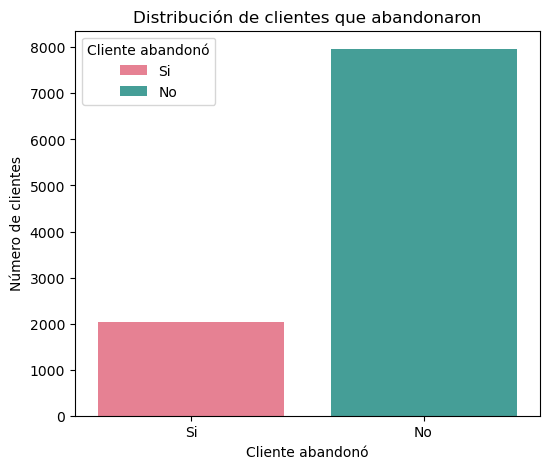

In [16]:
# Gráfico countplot de ClienteAbandono.
df['ClienteAbandono'] = df['ClienteAbandono'].replace({0: 'No', 1: 'Si'})
df['ClienteAbandono'] = df['ClienteAbandono'].astype(str)

plt.figure(figsize = (6, 5))

palette = sns.color_palette('husl', len(cliente_abandono.unique()))
ax = sns.countplot(data = df, x = 'ClienteAbandono', hue = 'ClienteAbandono', palette = palette)

plt.xlabel('Cliente abandonó')
plt.ylabel('Número de clientes')
plt.title('Distribución de clientes que abandonaron')
plt.legend(labels = ['Si', 'No'], title = 'Cliente abandonó', loc = 'upper left')
plt.show()

Se puede observar que la distribución de la columna **ClienteAbandono** está desbalanceada, ya que se tiene una proporción mucho menor de clientes que han abandonado (1) la entidad bancaria respecto a los que permanecen (0) en esta.

#### 3. Conclusiones

1. No se encontraron datos faltantes en el dataset.
2. El saldo muestra gran dispersión, con muchos valores bajos y algunos extremadamente altos, que podría ser relevante para la definición de estrategias de retención 
3. El puntaje de crédito muestra una concentración de clientes con puntajes alrededor de 600 a 700, pero también muestra valores atípicos muy altos o bajos.
4. Ambas columnas presentan outliers significativos, lo que podría afectar el análisis predictivo.
5. El dataset presenta datos ricos con variabilidad y outliers, lo que sugiere la necesidad de limpieza y transformación de estos para mejorar la calidad del modelo.